# Advanced Regression - Surprise Housing

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import datetime
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [2]:
#library to hide the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#setting the maximum rows and columns to visualize the data clearly
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [4]:
#load and read the data
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#checking the number of rows and columns in the dataset
housing.shape

(1460, 81)

## Performing EDA

In [6]:
#checking the missing Values
housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
#deleting the Id column as we are not going to use this column in the model building because it is just a record index 
housing.drop(['Id'], axis=1, inplace=True)

In [8]:
#deleting MoSold column as this won't be useful
housing.drop(['MoSold'], axis=1, inplace = True)

In [9]:
#Getting the percentage of the null values in the available columns
null_percentage = housing.isnull().sum()/len(housing.index)*100
null_percentage.sort_values(ascending=False).head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageQual       5.547945
GarageCond       5.547945
GarageFinish     5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
BedroomAbvGr     0.000000
dtype: float64

In [10]:
#dropping the column where more than 40% data is missing. In our case these are PoolQC, MiscFeature, Alley, Fence, FireplaceQu
housing.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace = True)

### Imputing the missing data

In [11]:
#checking datatype of LotFrontage column
housing.LotFrontage.dtypes

dtype('float64')

In [12]:
#checking the sum of all the null values LotFrontage column
housing.LotFrontage.isnull().sum()

259

In [13]:
#as the feature is continuous, imputing the missing data with median value
median = housing.LotFrontage.median()
print("Median of LotFrontage column is = ",median)

Median of LotFrontage column is =  69.0


In [14]:
#imputing null values with median
housing.LotFrontage.fillna(median, inplace = True)

In [15]:
#checking the sum of all the null values LotFrontage column again after imputation
housing.LotFrontage.isnull().sum()

0

In [16]:
#checking the datatype of GarageYrBlt column
housing.GarageYrBlt.dtypes

dtype('float64')

**GarageYrBlt is an year column. So imputing the column with mode(maximum number of occurrences of the year).**

In [17]:
#imputing null values with mode
housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].mode()[0], inplace = True)

In [18]:
#checking the sum of all the null values GarageYrBlt column again after imputation
housing['GarageYrBlt'].isnull().sum()

0

In [19]:
#checking the null values for other columns
(housing.isnull().sum()/len(housing.index)*100).sort_values(ascending=False).head(20)

GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtFinType1    2.534247
BsmtQual        2.534247
BsmtCond        2.534247
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
HalfBath        0.000000
FullBath        0.000000
BsmtHalfBath    0.000000
BsmtFullBath    0.000000
GrLivArea       0.000000
BedroomAbvGr    0.000000
LowQualFinSF    0.000000
KitchenAbvGr    0.000000
dtype: float64

In [20]:
#replacing all the null values with NA for the columns GarageCond, GarageType, GarageFinish, GarageQual, BsmtExposure, 
#BsmtFinType2, BsmtCond, BsmtQual which means either Garage not available or Basement not available

housing.GarageCond.fillna('NA', inplace = True)
housing.GarageType.fillna('NA', inplace = True)
housing.GarageFinish.fillna('NA', inplace = True)
housing.GarageQual.fillna('NA', inplace = True)
housing.BsmtExposure.fillna('NA', inplace = True)
housing.BsmtFinType2.fillna('NA', inplace = True)
housing.BsmtCond.fillna('NA', inplace = True)
housing.BsmtQual.fillna('NA', inplace = True)
housing.BsmtFinType1.fillna('NA', inplace = True)

In [21]:
#handling MasVnrType column (imputing with None)
housing.MasVnrType.fillna('None', inplace = True)

In [22]:
#handling MasVnrArea column. Replacing the null values with median.
housing.MasVnrArea.fillna(housing.MasVnrArea.median(), inplace = True)

In [23]:
#handling Electrical column. Replacing the null values with mode.
housing['Electrical'].fillna(housing['Electrical'].mode()[0], inplace = True)

In [24]:
#checking the null values for all the columns again
housing.isnull().sum().sort_values(ascending=False).head(5)

MSSubClass      0
GarageType      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
dtype: int64

**All the null values are imputed. Now we will check the datatype and correct if required.**

### Validation and correction of datatypes

In [25]:
#load the top 5 rows of the dataset
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,2008,WD,Normal,250000


In [26]:
#checking the datatype of all the columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [27]:
#converting YearBuilt to datetime
housing['YearBuilt'] = pd.to_datetime(housing.YearBuilt, format='%Y')
housing['YearBuilt'] = pd.DatetimeIndex(housing['YearBuilt']).year

In [28]:
#converting YearRemodAdd to datetime
housing['YearRemodAdd'] = pd.to_datetime(housing.YearRemodAdd, format='%Y')
housing['YearRemodAdd'] = pd.DatetimeIndex(housing['YearRemodAdd']).year

In [29]:
#converting GarageYrBlt to datetime
housing['GarageYrBlt'] = pd.to_datetime(housing.GarageYrBlt, format='%Y')
housing['GarageYrBlt'] = pd.DatetimeIndex(housing['GarageYrBlt']).year

In [30]:
#converting YrSold to datetime
housing['YrSold'] = pd.to_datetime(housing.YrSold, format='%Y')
housing['YrSold'] = pd.DatetimeIndex(housing['YrSold']).year

In [31]:
#loading the top 5 rows after converting the datatype of columns
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,2008,WD,Normal,250000


### Derived Metrics

In [32]:
#creating new columns houseAge, remodelAge, garageAge from the year columns
housing['houseAge'] = housing.YrSold - housing.YearBuilt
housing['remodelAge'] = housing.YrSold - housing.YearRemodAdd
housing['garageAge'] = housing.YrSold - housing.GarageYrBlt

In [33]:
#dropping the year columns as derived columns will be used for further model building
housing.drop(['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace = True)

**Now we know that few columns are suppose to be categorial values. Hence converting them to the corresponding meaningful values.**

In [34]:
#checking the values in MSSubClass column
housing.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [35]:
#converting MSSubClass to categorical
housing.MSSubClass = housing.MSSubClass.map({20:'1Story1946',  30:'1Story1945', 40:'1StoryFinished', 45:'1-1/2StoryUnfinished',
                                            50:'1-1/2StoryFinished', 60:'2Story1946', 70:'2Story1946', 75:'2-1/2Story',
                                            80:'SplitMulti', 85:'SplitFoyer', 90:'Duplex', 120:'1StoryPud', 160:'2StoryPud',
                                            180:'PudMulti', 190:'2Family'})

In [36]:
#checking the values in OverallQual column
housing.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [37]:
#converting OverallQual to categorical
housing.OverallQual = housing.OverallQual.map({1:'VeryPoorQual',  2:'PoorQual', 3:'FairQual', 4:'BelowAverageQual', 5:'AverageQual',
                                               6:'AboveAverageQual', 7:'GoodQual', 8:'VeryGoodQual', 9:'ExcellentQual', 10:'VeryExcellentQual'})

In [38]:
#checking the values in OverallCond column
housing.OverallCond.value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [39]:
#converting OverallQual to categorical
housing.OverallCond = housing.OverallCond.map({1:'VeryPoorCond',  2:'PoorCond', 3:'FairCond', 4:'BelowAverageCond', 5:'AverageCond', 
                                               6:'AboveAverageCond', 7:'GoodCond', 8:'VeryGoodCond', 9:'ExcellentCond'})

### Outlier Treatment and Removal of Redundant Variables/Fixing Class Imbalance

**A variable is called redundant if it is not relevant for the model due to class imbalance. Here we are considering 99% as maximum limit.**

In [40]:
#function to identify the columns where more than 99% data is of same type or to identify the class imbalance columns
def classImbalance(housing):
    imbalance = []
    for feat in housing.columns:
        total_count = housing[feat].value_counts()
        max_val = total_count.iloc[0]
        if max_val / len(housing) * 100 > 99:
            imbalance.append(feat)
    imbalance = list(imbalance)
    return imbalance

In [41]:
#calling the classImbalance function to find redundnt columns
redundant_variables = classImbalance(housing)
redundant_variables

['Street', 'Utilities', 'PoolArea']

**As more than 99% vales are same so there is no point of using this attribute. Hence deleting all the 3 redundant columns. This is an example of class imbalance.**

In [42]:
#dropping the redundant features
housing.drop(['Street', 'Utilities', 'PoolArea'], axis=1, inplace = True)

#### Checking the outliers of all the continuous/numeric features at once.

In [43]:
#getting the list of continuous features
conti = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
       'ScreenPorch', 'MiscVal', 'SalePrice', 'houseAge', 'remodelAge', 'garageAge']

In [44]:
#function to generate the boxplots for continuous variables
def continuous(count, feat):
    plt.subplot(7,5,count+1)
    sns.boxplot(x=feat, data=housing)

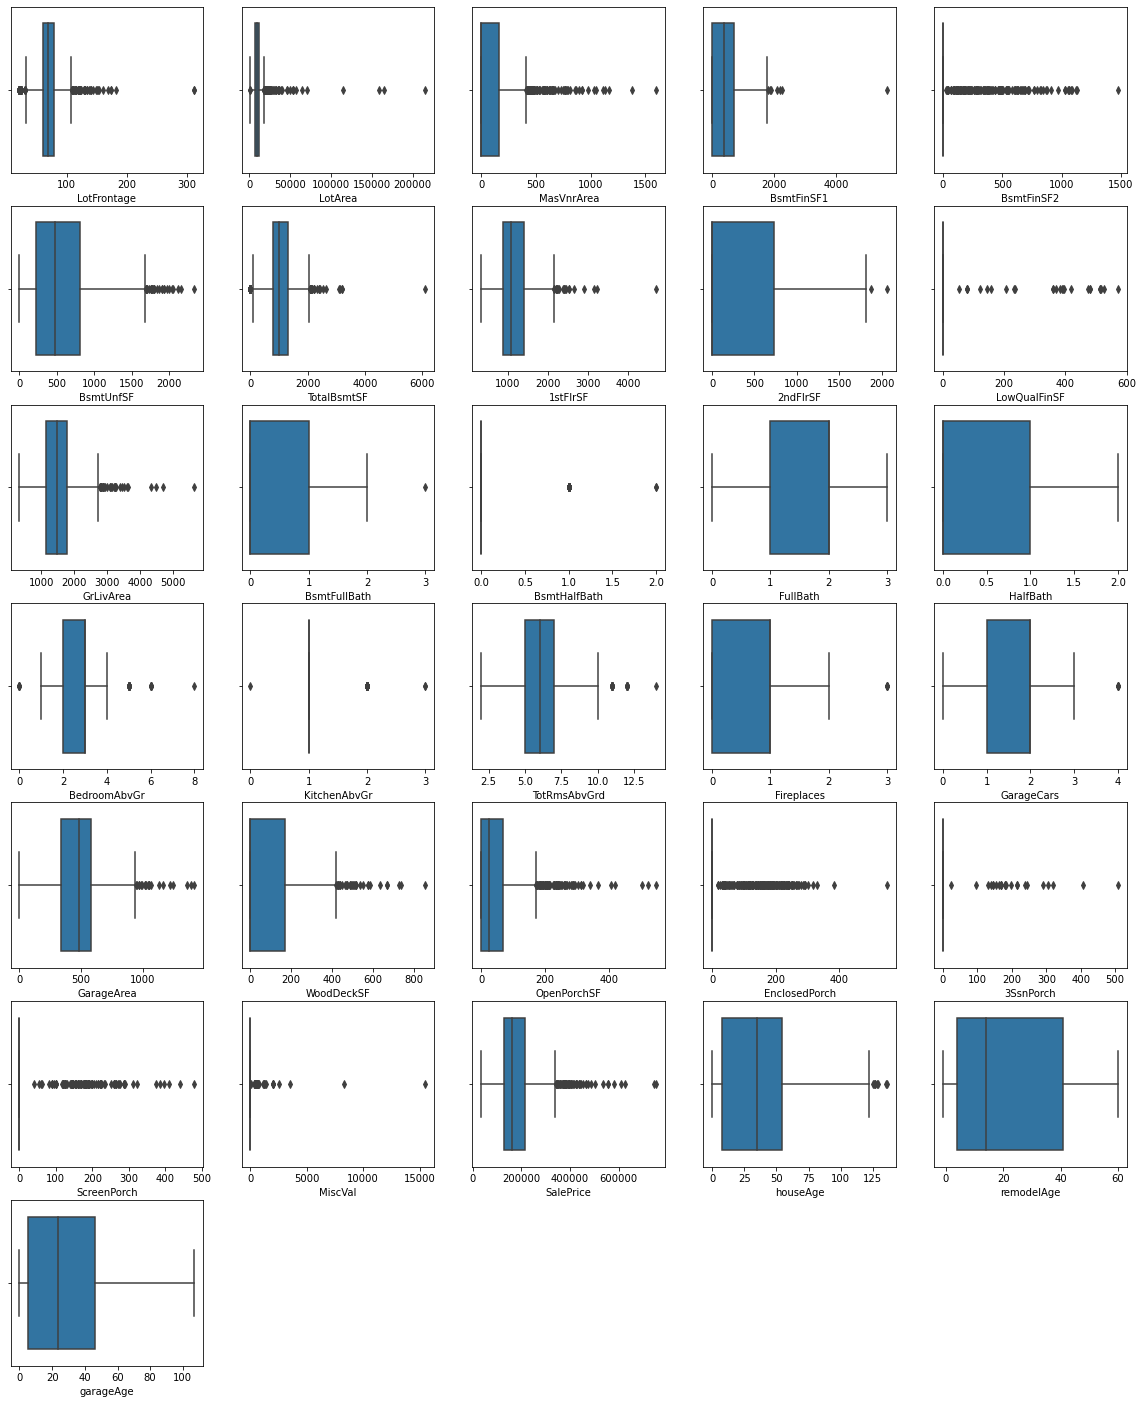

In [45]:
#calling the function to plot the boxplots to identify the outliers
plt.figure(figsize=(20,25))
for i, col in enumerate(conti):
    continuous(i, col)

**Inference:** We can clearly see the outliers in the data. Most of the outlier data looks realistic so will not remove it. Let's review the data distribution of few columns and remove the outliers from it.

In [46]:
#identifying the outliers of LotFrontage column using multiple quantile values
housing.LotFrontage.describe([.99, .95, .90, .85, .80])

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
50%        69.000000
80%        80.000000
85%        85.000000
90%        92.000000
95%       104.000000
99%       137.410000
max       313.000000
Name: LotFrontage, dtype: float64

In [47]:
#calculate 0.99 quantile data and taking in a variable
upper_LotFrontage=housing.LotFrontage.quantile(.99)

In [48]:
#we can see the maximum value is too high than 99% data. Hence replacing the maximum point with 99% value.
housing.LotFrontage = np.where(housing.LotFrontage>upper_LotFrontage,upper_LotFrontage,housing.LotFrontage)

In [49]:
#identifying the outliers of LotArea column using multiple quantile values
housing.LotArea.describe([.99, .95, .90, .85, .80])

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
50%        9478.500000
80%       12205.800000
85%       13161.100000
90%       14381.700000
95%       17401.150000
99%       37567.640000
max      215245.000000
Name: LotArea, dtype: float64

In [50]:
#calculate 0.99 quantile data and taking in a variable
upper_LotArea=housing.LotArea.quantile(.99)

In [51]:
#we can see the maximum value is too high than 99% data. Hence replacing the maximum point with 99% value.
housing.LotArea = np.where(housing.LotArea>upper_LotArea,upper_LotArea,housing.LotArea)

In [52]:
#identifying the outliers of BsmtFinSF1 column using multiple quantile values
housing.BsmtFinSF1.describe([.99, .95, .90, .85, .80])

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
50%       383.500000
80%       806.400000
85%       929.450000
90%      1065.500000
95%      1274.000000
99%      1572.410000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [53]:
#calculate 0.99 quantile data and taking in a variable
upper_BsmtFinSF1=housing.BsmtFinSF1.quantile(.99)

In [54]:
#we can see the maximum value is too high than 99% data. Hence replacing the maximum point with 99% value.
housing.BsmtFinSF1 = np.where(housing.BsmtFinSF1>upper_BsmtFinSF1,upper_BsmtFinSF1,housing.BsmtFinSF1)

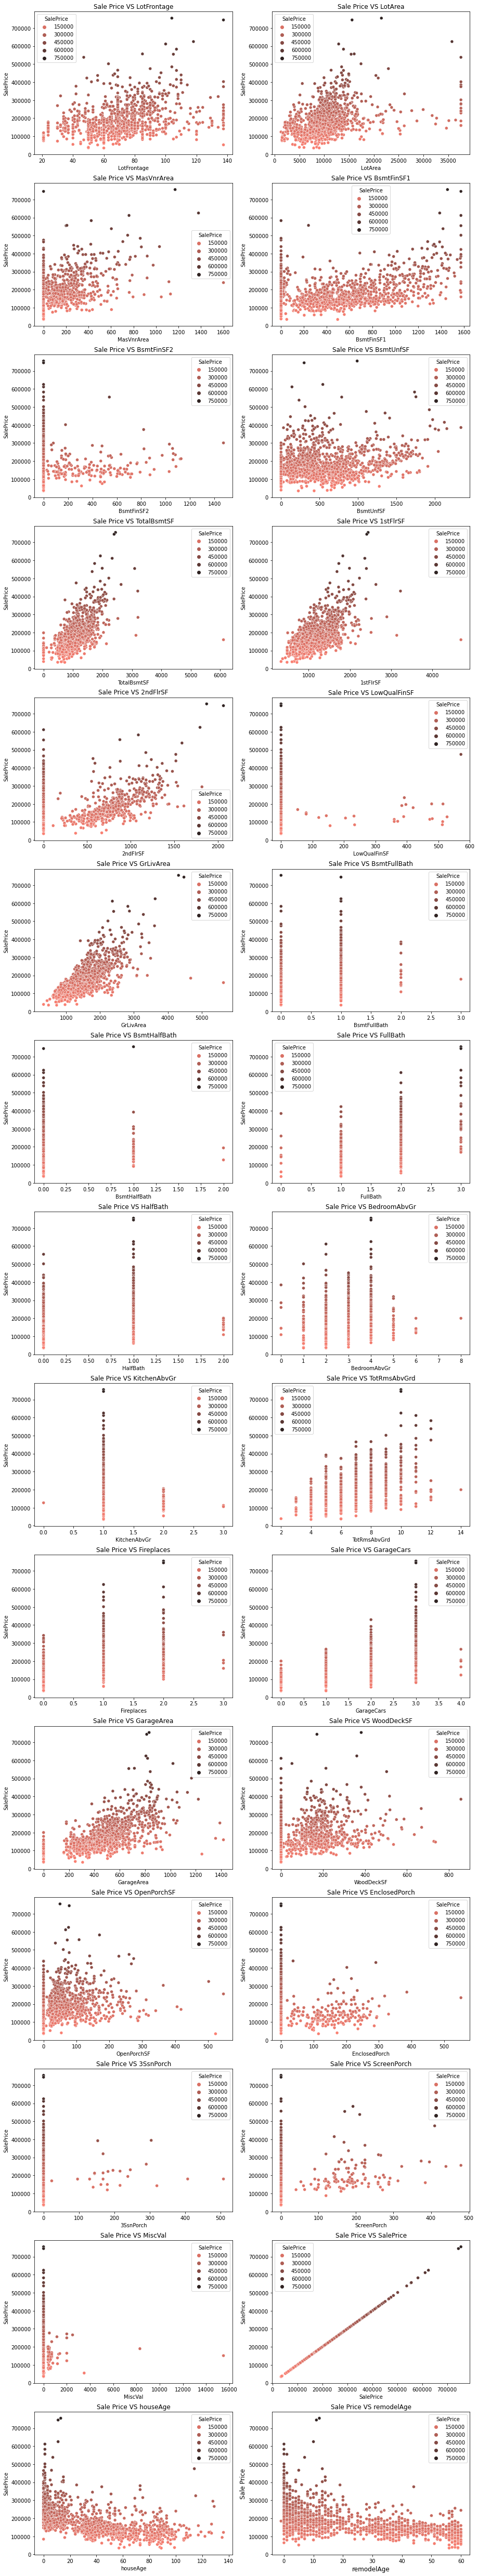

In [55]:
#checking the linear relation between independent and dependent features
housing_num = housing.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(15,2,figsize=(15,90))
for i,ax in zip(housing_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=housing_num,ax=ax,palette='dark:salmon_r')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('Sale Price',fontsize=12)
    ax.set_title('Sale Price'+' VS '+str(i))

**Inference:** There is linear relation between target and independent variables. Increase in the independent fetures is also causing the increase in the target feature or Sales price in our case. Hence we can use the regression approach here and try to find the euqation which fits with all the independent variables and provide the best-fit line or equation.

In [ ]:
#identifying relation between categorical independent features and target variable
def boxplots_categorical(features, sales, **kwargs):
    sns.boxplot(x=features, y=sales)
    x=plt.xticks(rotation=90)
    
categorical_feat = housing.select_dtypes(exclude=['int64','float64'])
plot = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(housing[categorical_feat.columns]))
box = sns.FacetGrid(plot, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
box = box.map(boxplots_categorical, "value", "SalePrice")

**Inference:**
- Sale price of single family and townhouse end unit is higher than others.
- If the basement condition, exposure is good then price is high.
- Houses with central AC are having higher price.
- Houses where the exterior quality is excellent, prices are high.
- Excellent quality of kitchen, garage and heating is also another reason of higher prices.
- New houses are having more prices than the old ones.

In [ ]:
#plotting the corelation using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(round(housing.corr(),2), cmap="YlGnBu", vmin=-1.0,vmax=1.0 , annot=True)
plt.show()

**Inference:**
- There are few features which are highly correlated (greater than 0.80)
- Total rooms above groung is highly correlated with above grade living area.
- Sales price is highly affected by garage cars, garage area, total room above ground, ground living area, first and second floor square feet.
- House age, garage age and remodel age are showing good correlation in themselves.

In [ ]:
#checking the distribution of the target variable
plt.title('Sale Price Distribution')
sns.distplot(housing['SalePrice'])
plt.show()

**We can clearly see that the distribution of the target variable is right skewed. Let's fix it using Log Transform.**

In [ ]:
#Using Log Transform to fix the skewness in the data
housing['SalePrice'] = np.log1p(housing['SalePrice'])
plt.title('Sale Price Distribution')
sns.distplot(housing['SalePrice'])
plt.show()

### Preparing the data for modelling / Data Preparation
#### Creating Dummy Variables

In [ ]:
#listing the categorical variables
categ = ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 
         'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 
         'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
         'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
         'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [ ]:
#checking if any of the categorical features have 2 unique values(identifying binary variables)
binary = []
for cat in housing[categ]:
    if len(housing[cat].value_counts()) == 2:
        binary.append(cat)
binary

In [ ]:
#CentralAir has only 2 values, hence convering Y with 1 and N with 0
housing.CentralAir = housing.CentralAir.map({'Y':1, 'N':0})

In [ ]:
#creating dummy variables for all the other categorical features
dummy = ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 
         'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 
         'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
         'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 
         'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [ ]:
#creating the dummy variables and deleting the original column using loop
for dum in housing[dummy]:
    housing_dummy = pd.get_dummies(housing[dum], drop_first=True)
    housing = pd.concat([housing, housing_dummy], axis=1)
    housing.drop([dum], axis = 1, inplace = True)

In [ ]:
#loading the top 5 rows after creating the dummy variables
housing.head()

In [ ]:
#checking the number of rows and columns available in the dataset
housing.shape

#### Train Test Split

In [ ]:
#importing the required library for spliting the test and train data
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
#splitting the data into train and test and displaying their shape
housing_train, housing_test = train_test_split(housing, train_size=0.7, random_state=100)
print(housing_train.shape)
print(housing_test.shape)

In [ ]:
#display the top 5 rows of train dataset
housing_train.head()

In [ ]:
#display the top 5 rows of test dataset
housing_test.head()

### Rescaling of variables
**Here, we will be using min-max scaling(normalisation) which will scale the data between 0 and 1.**

In [ ]:
#import the library for min-max scaling
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#instantiate an object for scaling
scaler = MinMaxScaler()

#scale the train data using fit_transform and test data using transform
housing_train[conti] = scaler.fit_transform(housing_train[conti])
housing_test[conti] = scaler.transform(housing_test[conti])

In [ ]:
#validating the train data to make sure scaling worked correctly
housing_train.describe()

In [ ]:
#validating the test data to make sure scaling worked correctly
housing_test.describe()

## Model Building and Evaluation

### RFE (Recursive Feature Elimination)

**First we are building the model using RFE to see the model coeffecients and accuracy. Then we will perform Ridge and Lasso to see how that improves the model performance.**

In [ ]:
#importing libraries for RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
#getting X_train and y_train from the housing_train dataset
y_train = housing_train.pop('SalePrice')
X_train = housing_train

In [ ]:
housing_test.head()

In [ ]:
#Running RFE with the output number of the variable equal to 100
lm = LinearRegression()
lm.fit(X_train, y_train)

#selected top 100 ranked attributes
rfe = RFE(lm, n_features_to_select = 100)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#list the ranking of all the columns which is done using RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
#check the top 100 columns with rank 1 selected in RFE
colm = X_train.columns[rfe.support_]
colm

In [ ]:
#Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[colm]

In [ ]:
#fitting the model
lm.fit(X_train_rfe, y_train)

In [ ]:
#predictions on the basis of the model
y_pred = lm.predict(X_train_rfe)
y_pred

### Linear Regression Model Evaluation

In [ ]:
#calculating r2 value
r2_linear = r2_score(y_train, y_pred)
print('r2 value of Linear Regression is: ',r2_linear)

#calculating Residual Sum of Square
rss_linear = np.sum(np.square(y_train - y_pred))
print('RSS value of Linear Regression is: ',rss_linear)

#calculating Mean Square Error
mse_linear = mean_squared_error(y_train, y_pred)
print('MSE value of Linear Regression is: ',mse_linear)

#calculating Root Mean Squared Error
rmse_linear = mse_linear**0.5
print('RMSE value of Linear Regression is: ',rmse_linear)

## Ridge Regression Model

In [ ]:
#getting X_test and y_test from the housing_test dataset
y_test = housing_test.pop('SalePrice')
X_test = housing_test

In [ ]:
#importing the libraries and instantiating the objects
from sklearn.linear_model import Lasso,Ridge

ridge1 = Ridge()
ridge1.fit(X_train, y_train)

In [ ]:
#defining the function to evaluate the metrics for test dataset
def get_error_stats_test(y,y_pred,name="Test",DoPrint=True):
    MSE = mean_squared_error(y, y_pred)
    MAE = mean_absolute_error(y, y_pred)
    R2 = r2_score(y, y_pred)
    if DoPrint:
        print(F"MSE {name} {MSE}")
        print(F"MAE Score {name} {MAE}")
        print(F"R2 Score {name} {R2} \n")
    return MSE,MAE,R2

In [ ]:
#defining the function to evaluate the metrics for train dataset
def get_error_stats_train(y,y_pred,name="Train",DoPrint=True):
    MSE = mean_squared_error(y, y_pred)
    MAE = mean_absolute_error(y, y_pred)
    R2 = r2_score(y, y_pred)
    if DoPrint:
        print(F"MSE {name} {MSE}")
        print(F"MAE Score {name} {MAE}")
        print(F"R2 Score {name} {R2} \n")
    return MSE,MAE,R2

In [ ]:
#predicting the target variable without any hyperparameter
print("Number of non-zero Coefficients {}".format(np.sum(ridge1.coef_!=0)))
y_pred_train = ridge1.predict(X_train)
get_error_stats_train(y_train,y_pred_train)

y_pred_test = ridge1.predict(X_test)
get_error_stats_test(y_test,y_pred_test)

**We can clearly see there is huge difference between the prediction of training and test dataset which is an indicator of overfitting in the model. <br><br>
To rectify this isse taking only one random alpha value to see the model performance**

In [ ]:
ridge2 = Ridge(alpha=0.001)
ridge2.fit(X_train,y_train)

#predicting the target variable with only one alpha value
print("Number of non-zero Coefficients {}".format(np.sum(ridge2.coef_!=0)))
y_pred_train = ridge2.predict(X_train)
get_error_stats_train(y_train,y_pred_train)

y_pred_test = ridge2.predict(X_test)
get_error_stats_test(y_test,y_pred_test)

**We can still see the significant difference between the train and test result. Now we will take multiple values of alpha and use GridSearch cross validation to get the more accurate value of alpha.**

In [ ]:
#list of alphas for hypertuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 400, 500, 1000 ]}

ridge3 = Ridge()

#folds for cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge3, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train)

In [ ]:
#taking the result in a new variable and displaying top 5 rows of it
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge.head()

In [ ]:
#checking the datatype of param_alpha feature 
cv_results_ridge.info()

In [ ]:
#converting object to float32
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('float32')

In [ ]:
# plotting mean test and train scores with alpha
sns.set(rc={'figure.figsize':(16,8)})
plt.plot(cv_results_ridge['param_alpha'],cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'],cv_results_ridge['mean_test_score'])
plt.xlabel('Alpha')
plt.title("R2 Score vs Alpha")
plt.ylabel('R2 Score')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

alpha = cv_results_ridge['param_alpha'].loc[cv_results_ridge['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)

**From the above graph, optimal value of alpha is coming as 5. Let's use this value of alpha and build the model.**
### Final Ridge Model

In [ ]:
ridge = Ridge(alpha=5)
ridge.fit(X_train,y_train)

#predicting the target variable with new alpha value
print("Number of non-zero Coefficients {}".format(np.sum(ridge.coef_!=0)))
y_pred_train = ridge.predict(X_train)
get_error_stats_train(y_train,y_pred_train)

y_pred_test = ridge.predict(X_test)
get_error_stats_test(y_test,y_pred_test)

**From the above data, it is clearly visible that the difference of MSE, R2, between train and test data is minimal. Hence we can use this value of alpha and build the model.** 

In [ ]:
#taking the coefficients to a new variable
ridge_coeff = ridge.coef_

In [ ]:
#displaying all the coefficients
ridge_coefficients = pd.DataFrame(np.atleast_2d(ridge_coeff),columns=X_train.columns)
ridge_coefficients = ridge_coefficients.T
ridge_coefficients.rename(columns={0: 'Ridge Coefficient'},inplace=True)
ridge_coefficients.sort_values(by=['Ridge Coefficient'], ascending=False,inplace=True)
ridge_coefficients.head(10)

## Residual Analysis of Ridge Model
### 1. Normal Distribution of Error Terms

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
residual = y_train - y_pred_train

# Plot the histogram of the error terms
sns.distplot(residual, bins = 20)
plt.title('Error Terms', fontsize = 16)
plt.xlabel('Errors', fontsize = 15)        
plt.ylabel('Density', fontsize = 15)
plt.show()

In [ ]:
#plotting Q–Q plot
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

### 2. Error Terms are Independent (No Pattern)

In [ ]:
#look for patterns in residuals (we should not be able to identify)
sns.regplot(y_pred_train, residual)
plt.title('Residual Spread for Predicted Points', fontsize = 20)
plt.xlabel('Predicted Points', fontsize = 15)
plt.ylabel('Residuals', fontsize = 15)
plt.show()

### 3. Autocorrelation

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

### Model Evaluation on the Test Set

In [ ]:
# Plotting y_test and y_pred to understand the spread
sns.regplot(y_test, y_pred_test)
plt.title('Predicted Test Points Vs. Actual Test Points', fontsize = 16)
plt.xlabel('Actual Data', fontsize = 15)
plt.ylabel('Predicted Data', fontsize = 15)
plt.show()

## Lasso Regression Model

In [ ]:
#initiating the lasso object
lasso1 = Lasso()
lasso1.fit(X_train, y_train)

In [ ]:
#predicting the target variable without any hyperparameter
print("Number of non-zero Coefficients {}".format(np.sum(lasso1.coef_!=0)))
y_pred_train = lasso1.predict(X_train)
get_error_stats_train(y_train,y_pred_train)

y_pred_test = lasso1.predict(X_test)
get_error_stats_test(y_test,y_pred_test)

In [ ]:
lasso2 = Lasso(alpha=0.001)
lasso2.fit(X_train,y_train)

#predicting the target variable with only one alpha value
print("Number of non-zero Coefficients {}".format(np.sum(lasso2.coef_!=0)))
y_pred_train = lasso2.predict(X_train)
get_error_stats_train(y_train,y_pred_train)

y_pred_test = lasso2.predict(X_test)
get_error_stats_test(y_test,y_pred_test)

In [ ]:
#list of alphas for hypertuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6]}

lasso3 = Lasso()

#folds for cross validation
folds = 5
model_cv_lasso = GridSearchCV(estimator = lasso3, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_lasso.fit(X_train, y_train)

In [ ]:
#taking the result in a new variable and displaying top 5 rows of it
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso.head()

In [ ]:
#checking the datatype of param_alpha feature 
cv_results_lasso.info()

In [ ]:
#converting object to float32
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

In [ ]:
#plotting mean test and train scores with alpha
plt.figure(figsize=(16,8))
plt.plot(cv_results_lasso['param_alpha'],cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'],cv_results_lasso['mean_test_score'])
plt.xlabel('Alpha')
plt.title("R2 Score vs Alpha")
plt.ylabel('R2 Score')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

alpha = cv_results_lasso['param_alpha'].loc[cv_results_lasso['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)

**From the above graph, optimal value of alpha is coming as 0.0001. Let's use this value of alpha and build the model.**
### Final Lasso Model

In [ ]:

lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

#predicting the target variable with new alpha value
print("Number of non-zero Coefficients {}".format(np.sum(lasso.coef_!=0)))
y_pred_train = lasso.predict(X_train)
get_error_stats_train(y_train,y_pred_train)

y_pred_test = lasso.predict(X_test)
get_error_stats_test(y_test,y_pred_test)

**From the above data, it is clearly visible that the difference of MSE, R2, between train and test data is minimal. Hence we can use this value of alpha and build the model.**

In [ ]:
#taking the coefficients to a new variable
lasso_coeff = lasso.coef_

In [ ]:
#displaying all the coefficients
lasso_coefficients = pd.DataFrame(np.atleast_2d(lasso_coeff),columns=X_train.columns)
lasso_coefficients = lasso_coefficients.T
lasso_coefficients.rename(columns={0: 'Lasso Coefficient'},inplace=True)
lasso_coefficients.sort_values(by=['Lasso Coefficient'], ascending=False,inplace=True)
lasso_coefficients.head(10)

## Residual Analysis of Ridge Model
### 1. Normal Distribution of Error Terms

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
residual = y_train - y_pred_train

# Plot the histogram of the error terms
sns.distplot(residual, bins = 20)
plt.title('Error Terms', fontsize = 16)
plt.xlabel('Errors', fontsize = 15)        
plt.ylabel('Density', fontsize = 15)
plt.show()

In [ ]:
#plotting Q–Q plot
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

### 2. Error Terms are Independent (No Pattern)

In [ ]:
#look for patterns in residuals (we should not be able to identify)
sns.regplot(y_pred_train, residual)
plt.title('Residual Spread for Predicted Points', fontsize = 20)
plt.xlabel('Predicted Points', fontsize = 15)
plt.ylabel('Residuals', fontsize = 15)
plt.show()

### 3. Autocorrelation

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

### Model Evaluation on the Test Set

In [ ]:
# Plotting y_test and y_pred to understand the spread
sns.regplot(y_test, y_pred_test)
plt.title('Predicted Test Points Vs. Actual Test Points', fontsize = 16)
plt.xlabel('Actual Data', fontsize = 15)
plt.ylabel('Predicted Data', fontsize = 15)
plt.show()

<hr></hr>

## Summary and Conclusion
### Model Evaluation of Ridge Regression

- **R2:** 0.89 <br>
- **MSE:** 0.0019 <br>
- **Alpha:** 5 <br>

### Model Evaluation of Lasso Regression

- **R2:** 0.88 <br>
- **MSE:** 0.0020 <br>
- **Alpha:** 0.0001 <br>

### Conclusion

- The calculated r2 value on test dataset is high for ridge regression.
- The mean square error on test dataset is high for lasso regression.
- Hence, it is concluded that Ridge Regression performed better for our dataset. 

<hr></hr>

## Subjective Questions Evaluation
### Question 1:
#### What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


In [ ]:
#building the model after doubling the value of alpha (from 5 to 10)
ridge_subjective = Ridge(alpha=10)
ridge_subjective.fit(X_train,y_train)

#predicting the target variable with new alpha value
print("Number of non-zero Coefficients {}".format(np.sum(ridge_subjective.coef_!=0)))
y_pred_train_sub = ridge_subjective.predict(X_train)
get_error_stats_train(y_train,y_pred_train_sub)

y_pred_test_sub = ridge_subjective.predict(X_test)
get_error_stats_test(y_test,y_pred_test_sub)

In [ ]:
#taking the coefficients to a new variable
ridge_coeff_sub = ridge_subjective.coef_

#displaying all the coefficients
ridge_coefficients_sub = pd.DataFrame(np.atleast_2d(ridge_coeff_sub),columns=X_train.columns)
ridge_coefficients_sub = ridge_coefficients_sub.T
ridge_coefficients_sub.rename(columns={0: 'Ridge Coefficient'},inplace=True)
ridge_coefficients_sub.sort_values(by=['Ridge Coefficient'], ascending=False,inplace=True)
ridge_coefficients_sub.head(10)

In [ ]:
#building the model after doubling the value of alpha (from 0.0001 to 0.0002)
lasso_subjective = Lasso(alpha=0.0002)
lasso_subjective.fit(X_train,y_train)

#predicting the target variable with new alpha value
print("Number of non-zero Coefficients {}".format(np.sum(lasso_subjective.coef_!=0)))
y_pred_train_sub = lasso_subjective.predict(X_train)
get_error_stats_train(y_train,y_pred_train_sub)

y_pred_test_sub = lasso_subjective.predict(X_test)
get_error_stats_test(y_test,y_pred_test_sub)

In [ ]:
#taking the coefficients to a new variable
lasso_coeff_sub = lasso_subjective.coef_
#displaying all the coefficients
lasso_coefficients_sub = pd.DataFrame(np.atleast_2d(lasso_coeff_sub),columns=X_train.columns)
lasso_coefficients_sub = lasso_coefficients_sub.T
lasso_coefficients_sub.rename(columns={0: 'Lasso Coefficient'},inplace=True)
lasso_coefficients_sub.sort_values(by=['Lasso Coefficient'], ascending=False,inplace=True)
lasso_coefficients_sub.head(10)

### Question 3
#### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [ ]:
X_train_drop5 = X_train
X_test_drop5 = X_test

In [ ]:
#drop five most important predictor variables from train and test dataset
X_train_drop5 = X_train_drop5.drop(['GrLivArea','BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','2ndFlrSF'], axis=1)
X_test_drop5 = X_test_drop5.drop(['GrLivArea','BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','2ndFlrSF'], axis=1)

In [ ]:
X_train_drop5.head()

In [ ]:
#building the model after with same alpha value after dropping top 5 features
lasso_sub_drop = Lasso(alpha=0.0001)
lasso_sub_drop.fit(X_train_drop5,y_train)

#predicting the target variable with new alpha value
print("Number of non-zero Coefficients {}".format(np.sum(lasso_sub_drop.coef_!=0)))
y_pred_train_sub_drop = lasso_sub_drop.predict(X_train_drop5)
get_error_stats_train(y_train,y_pred_train_sub_drop)

y_pred_test_sub_drop = lasso_sub_drop.predict(X_test_drop5)
get_error_stats_test(y_test,y_pred_test_sub_drop)

In [ ]:
#taking the coefficients to a new variable
lasso_coeff_sub_drop = lasso_sub_drop.coef_
#displaying all the coefficients
lasso_coefficients_sub_drop = pd.DataFrame(np.atleast_2d(lasso_coeff_sub_drop),columns=X_train_drop5.columns)
lasso_coefficients_sub_drop = lasso_coefficients_sub_drop.T
lasso_coefficients_sub_drop.rename(columns={0: 'Lasso Coefficient'},inplace=True)
lasso_coefficients_sub_drop.sort_values(by=['Lasso Coefficient'], ascending=False,inplace=True)
lasso_coefficients_sub_drop.head(10)